# Recomendacion de productos Sephora

In [608]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import ast

## Importar tablas

In [616]:
products = pd.read_csv("product_info.csv")

In [555]:

reviews1 = pd.read_csv("reviews_0-250.csv")
reviews2 = pd.read_csv("reviews_250-500.csv")
reviews3 = pd.read_csv("reviews_500-750.csv")
reviews4 = pd.read_csv("reviews_750-1250.csv")
reviews5 = pd.read_csv("reviews_1250-end.csv")

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/2251219999.py:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/2251219999.py:4: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/2251219999.py:5: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



## Products

In [557]:
products.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


In [558]:
products.shape

(8494, 27)

In [559]:
products.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

## Eliminar columnas de products

In [588]:
products.drop(
    ["variation_desc", "value_price_usd", "sale_price_usd", "child_max_price", "child_min_price"],
    axis = 1,
    inplace = True
)

KeyError: "['variation_desc', 'value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price'] not found in axis"

In [590]:
products.shape

(8494, 22)

### Hay nulos y duplicados en product_id, (product_name,skin_type, 'eye_color', 'hair_color', 'skin_tone' )

In [624]:
(products.isnull().sum()/ len(products) *100).round(2)

product_id             0.00
product_name           0.00
brand_id               0.00
brand_name             0.00
loves_count            0.00
rating                 3.27
reviews                3.27
size                  19.20
variation_type        17.00
variation_value       18.81
variation_desc        85.28
ingredients           11.13
price_usd              0.00
value_price_usd       94.69
sale_price_usd        96.82
limited_edition        0.00
new                    0.00
online_only            0.00
out_of_stock           0.00
sephora_exclusive      0.00
highlights             0.00
primary_category       0.00
secondary_category     0.09
tertiary_category     11.66
child_count            0.00
child_max_price       67.58
child_min_price       67.58
highlights 1          25.98
highlights 2          27.49
highlights 3          34.58
highlights 4          41.62
highlights 5          50.08
highlights 6          64.98
highlights 7          99.76
highlights 8          99.93
highlights 9        

In [569]:
products.product_id.isnull().sum() #no tiene nulos 

0

In [571]:
products.product_id.duplicated().sum()

0

In [592]:
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Pack,False,NaN,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,100mL,True,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,100mL,True,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,100mL,True,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,100mL,True,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [605]:
products.highlights.unique()

array(["['Unisex/ Genderless Scent', 'Warm &Spicy Scent', 'Woody & Earthy Scent', 'Fresh Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Warm &Spicy Scent']",
       "['Unisex/ Genderless Scent', 'Layerable Scent', 'Woody & Earthy Scent']",
       ...,
       "['Best for Oily, Combo, Normal Skin', 'Without Parabens', 'Without Mineral Oil', 'Matte Finish', 'Salicylic Acid']",
       "['Natural Finish', 'Without Mineral Oil', 'Without Parabens']",
       "['Hyaluronic Acid', 'High Shine Finish', 'Plumping', 'Hydrating', 'Medium Coverage']"],
      dtype=object)

### Arreglo Columna Size

In [576]:
# Función para procesar cada valor
def procesar_valor(valor):
    # Asegurarse de que el valor sea una cadena de texto
    valor = str(valor)
    
    # Buscar si contiene "oz/ mL"
    match_ml = re.search(r'(\d+(\.\d+)?)\s*oz\s*/\s*(\d+\s*mL)', valor)
    if match_ml:
        return match_ml.group(3).replace(' ', '')
    
    # Buscar si contiene "oz/ g"
    match_g = re.search(r'(\d+(\.\d+)?)\s*oz\s*/\s*(\d+\s*g)', valor)
    if match_g:
        return match_g.group(3).replace(' ', '')
    
    # Si solo contiene "oz"
    match_oz = re.search(r'(\d+(\.\d+)?)\s*oz', valor)
    if match_oz:
        oz_val = float(match_oz.group(1))
        # Convertir oz a mL (1 oz = 29.5735 mL)
        ml_val = oz_val * 29.5735
        return f"{ml_val:.1f} mL"
    
    # Si no coincide con ninguno, devolver el valor original
    return valor

# Aplicar la función a cada valor de la columna
products['size'] = products['size'].apply(procesar_valor)

In [578]:
filter_gift = products["secondary_category"]=='Value & Gift Sets'
products.loc[filter_gift, "size"] = "Pack"

In [580]:
products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Pack,NaN,NaN,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,100mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,100mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,100mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,100mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [586]:
# Crear una nueva columna que contenga True si 'variation_type' tiene un valor y False si está vacío
#products["variation_type"].apply(lambda x: 0 if pd.isna(x) else 1)
products['variation_type'] = products['variation_type'].notna() & products['variation_type'].astype(bool)

In [594]:
products.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,Pack,False,NaN,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,100mL,True,3.4 oz/ 100 mL,...,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


In [626]:
products.iloc[100,:]

product_id                                                      P392945
product_name                GENIUS Ultimate Anti-Aging Vitamin C+ Serum
brand_id                                                           6018
brand_name                                                     Algenist
loves_count                                                       10068
rating                                                           3.9825
reviews                                                           229.0
size                                                        1 oz/ 30 mL
variation_type                                                     Size
variation_value                                             1 oz/ 30 mL
variation_desc                                                      NaN
ingredients           ['Water, Glycerin, Butylene Glycol, 3-O-Ethyl ...
price_usd                                                         118.0
value_price_usd                                                 

## Separacion Highlights

In [610]:
# Función para convertir las cadenas en listas, manejando valores NaN
def convert_to_list(highlight):
    if pd.isna(highlight):
        return []  # O podrías usar `return highlight` si prefieres mantener los NaN
    return ast.literal_eval(highlight)

In [618]:
# Aplicar la función a la columna 'highlights'
products.loc[:,'highlights'] = products.loc[:, 'highlights'].apply(convert_to_list)
max_len = products['highlights'].apply(len).max()
for i in range(max_len):  # Limitar a un máximo de 9 columnas
    products[f'highlights {i+1}'] = np.nan
# Iterar sobre los primeros dos elementos de products['highlights']
#for i in range(len(data_high)):
for i in range(len(products)):
    for j in range(len(products.highlights[i])):
      #print(f"La posición {i}, {j} es {data_high.highlights[i][j]}")
        products.loc[i, f'highlights {j+1}'] = products.highlights[i][j]

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/203888917.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unisex/ Genderless Scent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/203888917.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Warm &Spicy Scent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_89546/203888917.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Woody & Earthy Scent' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/var/folders/m_/06pskt392pn6qvkq92krm8xm0000gn/T/ipykernel_8

In [620]:
products.head(2)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,child_min_price,highlights 1,highlights 2,highlights 3,highlights 4,highlights 5,highlights 6,highlights 7,highlights 8,highlights 9
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,NaN,Unisex/ Genderless Scent,Warm &Spicy Scent,Woody & Earthy Scent,Fresh Scent,NaN,NaN,NaN,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,30.0,Unisex/ Genderless Scent,Layerable Scent,Warm &Spicy Scent,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de Ingredientes

In [631]:
# Cargar los datos
df = products.copy()
# Limpieza de datos
# Reemplazar valores nulos con "None"
df['ingredients'] = df['ingredients'].fillna('None')
# Asegurarse de que todas las entradas sean cadenas
df['ingredients'] = df['ingredients'].astype(str)
# Eliminar caracteres innecesarios, pero mantener números, barras y guiones
df['ingredients'] = df['ingredients'].apply(lambda x: re.sub(r'[^a-zA-Z0-9, /()-]', '', x) if isinstance(x, str) else x)
# Tokenización - asegurarse de no separar nombres compuestos
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
# Eliminación de duplicados dentro de cada lista de ingredientes
df['ingredients'] = df['ingredients'].apply(lambda x: list(set(x)) if isinstance(x, list) else [])
# Normalización de texto sin cambiar el formato original
df['ingredients'] = df['ingredients'].apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
# Convertir de nuevo a una cadena para una presentación más limpia si es necesario
df['ingredients'] = df['ingredients'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
# Revisión final de la columna de ingredientes
print(df['ingredients'].head())

0    Coumarin, Parfum (Fragrance) Benzyl Salicylate...
1    Coumarin Limonene, Ethylhexyl Salicylate, Benz...
2    Ethylhexyl Methoxycinnamate, Linalool, Coumari...
3    Parfum (Fragrance) Coumarin, Ethylhexyl Methox...
4    Ethylhexyl Methoxycinnamate, Coumarin, Ethylhe...
Name: ingredients, dtype: object


## Reviews1 

### Buscar relacion entre productos, tipo de piel, ojo, tono de piel, y cabello en reviews1

In [88]:
reviews1.head(50)

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,skin_tone_grouped
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,NaN
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,NaN
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,NaN
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,NaN
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,NaN


In [92]:
reviews1.skin_tone.unique()

array([nan, 'light', 'lightMedium', 'fairLight', 'fair', 'medium',
       'notSureST', 'mediumTan', 'tan', 'rich', 'olive', 'deep',
       'porcelain', 'dark', 'ebony'], dtype=object)

In [94]:
skin_tone_new = {
    'porcelain': 'Muy Claro',
    'fair': 'Muy Claro',
    'fairLight': 'Muy Claro',
    'light': 'Muy Claro',
    'lightMedium': 'Claro a Medio',
    'medium': 'Claro a Medio',
    'olive': 'Medio a Bronceado',
    'mediumTan': 'Medio a Bronceado',
    'tan': 'Medio a Bronceado',
    'rich': 'Oscuro',
    'deep': 'Oscuro',
    'dark': 'Oscuro',
    'ebony': 'Oscuro',
    'notSureST': 'No Especificado'
}

In [96]:
# Aplicar el mapeo a la columna 'skin_tone'
reviews1['skin_tone_grouped'] = reviews1['skin_tone'].map(skin_tone_new)

In [141]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

In [151]:
skin_tone_groups_counts = reviews1.groupby(['product_id', 'skin_tone_grouped']).size().unstack(fill_value=0)
skin_tone_groups_counts

skin_tone_grouped,Claro a Medio,Medio a Bronceado,Muy Claro,No Especificado,Oscuro
product_id,,,,,
P114902,231,120,535,0,27
P12045,294,128,660,1,26
P122718,195,105,393,0,18
P122774,281,124,667,0,15
P122882,257,92,554,0,18
...,...,...,...,...,...
P504595,701,273,1305,0,104
P504615,739,284,1221,0,78
P54509,441,188,669,0,68


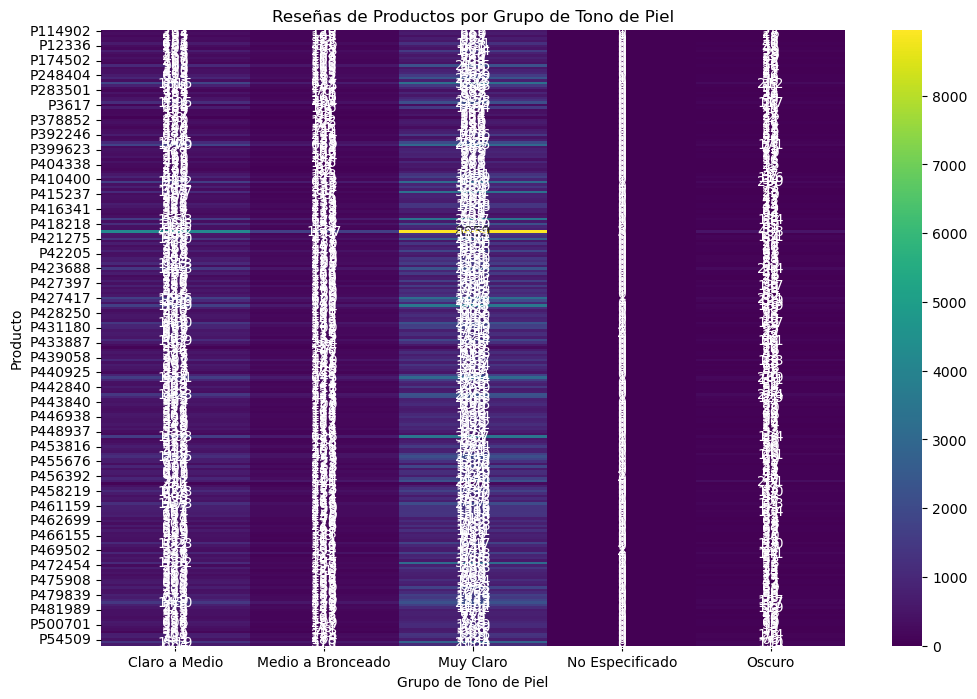

In [153]:
# Heatmap para grupos de tonos de piel
plt.figure(figsize=(12, 8))
sns.heatmap(skin_tone_groups_counts, cmap='viridis', annot=True, fmt='d')
plt.title('Reseñas de Productos por Grupo de Tono de Piel')
plt.xlabel('Grupo de Tono de Piel')
plt.ylabel('Producto')
plt.show()

#### Size unificar a ml ó gr. Si es de categoría 2, value and gift, size = Pack

In [29]:
import plotly.express as px

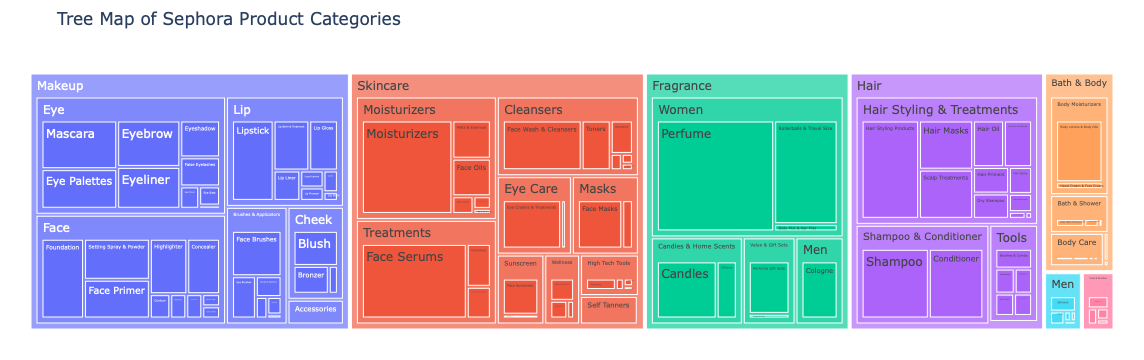

In [31]:
products['size'] = 1

# Filtrar y seleccionar las columnas necesarias
grafic = products[['primary_category', 'secondary_category', 'tertiary_category', 'size']]

# Asegúrate de que no haya valores nulos en las categorías
grafic.dropna(subset=['primary_category', 'secondary_category', 'tertiary_category'], inplace=True)

# Crear el gráfico de treemap usando Plotly
fig = px.treemap(grafic, path=['primary_category', 'secondary_category', 'tertiary_category'], values='size', title='Tree Map of Sephora Product Categories')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig.show()